

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>







<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

We're on the right track with this version, but touching up the points indicated below will lead us to an even more amazing result.

Count on me to assist you with any questions you may have! Remember to use the blue boxes to communicate with me.

See you soon
</div>


# Descrição do Projeto

A empresa Sweet Lift Taxi coletou dados históricos sobre pedidos de táxi nos aeroportos. Para atrair mais motoristas durante o horário de pico, precisamos prever a quantidade de pedidos de táxi para a próxima hora. 	
Construa um modelo para tal predição.

A métrica REQM no conjunto de teste não deve ser superior a 48.

## Instruções do projeto

1. Faça download dos dados e faça uma nova amostragem em uma hora.
2. Analise os dados
3. Treine diferentes modelos com diferentes hiperparâmetros. A amostra de teste deve ser 10% do conjunto de dados inicial.
4. Teste os dados usando a amostra de teste e forneça uma conclusão.

## Descrição dos dados

Os dados são armazenados no arquivo `taxi.csv`. O número de pedidos está na coluna `num_orders`.

## Preparação 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col='datetime')

In [3]:
data.sort_index(inplace=True)

In [4]:
print(data.head())

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [6]:
print(data.describe())

         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000


In [7]:
data = data.resample('1H').sum()

In [8]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean())

In [9]:
make_features(data, 4, 5)

In [10]:
print(data.head())

                     num_orders  year  month  day  dayofweek  lag_1  lag_2  \
datetime                                                                     
2018-03-01 00:00:00         124  2018      3    1          3    NaN    NaN   
2018-03-01 01:00:00          85  2018      3    1          3  124.0    NaN   
2018-03-01 02:00:00          71  2018      3    1          3   85.0  124.0   
2018-03-01 03:00:00          66  2018      3    1          3   71.0   85.0   
2018-03-01 04:00:00          43  2018      3    1          3   66.0   71.0   

                     lag_3  lag_4  rolling_mean  
datetime                                         
2018-03-01 00:00:00    NaN    NaN           NaN  
2018-03-01 01:00:00    NaN    NaN           NaN  
2018-03-01 02:00:00    NaN    NaN           NaN  
2018-03-01 03:00:00  124.0    NaN           NaN  
2018-03-01 04:00:00   85.0  124.0           NaN  


## Análise

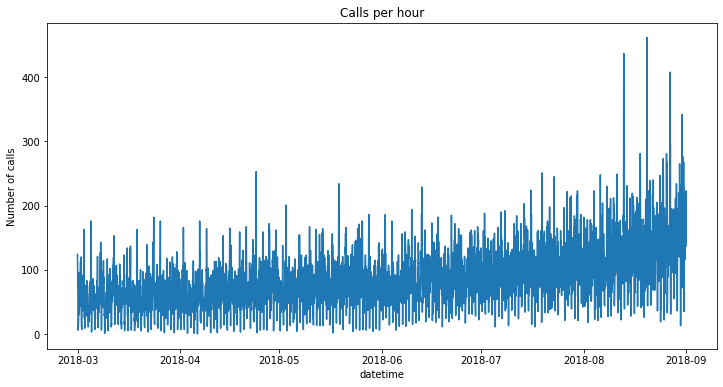

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=data.index, y=data['num_orders']);
plt.title('Calls per hour');
plt.ylabel('Number of calls');

we can see some outliers and a small growth trend

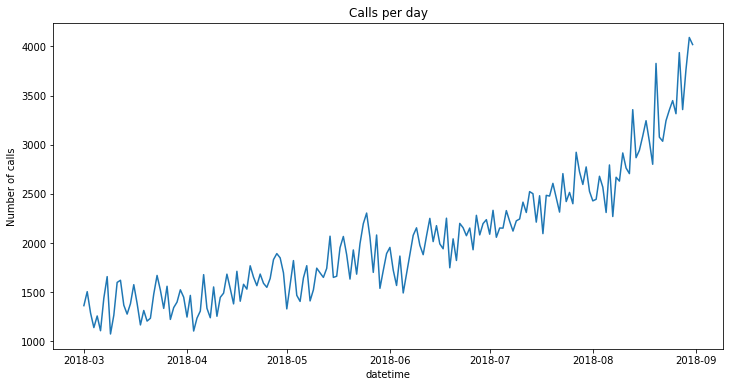

In [12]:
data_day = data.resample('D').sum()
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=data_day.index, y=data_day['num_orders']);
plt.title('Calls per day');
plt.ylabel('Number of calls');

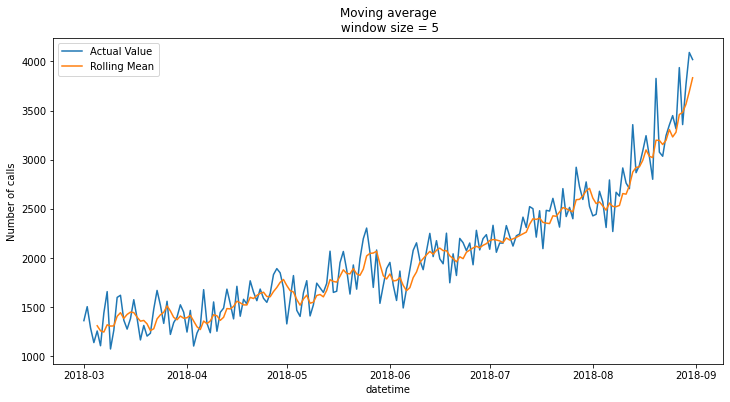

In [13]:
window = 5
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=data_day.index, y=data_day['num_orders'], label='Actual Value');
plt.title(f'Moving average\n window size = {window}');
plt.ylabel('Number of calls');
sns.lineplot(x=data_day.index, y=data_day['num_orders'].rolling(window).mean(), label='Rolling Mean');
plt.legend(loc='upper left');


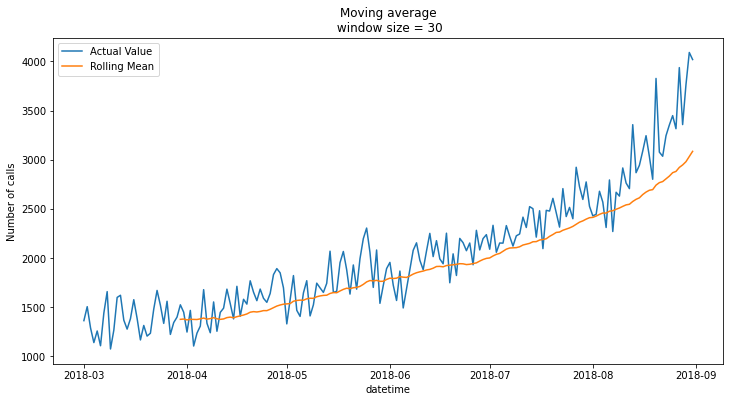

In [14]:
window = 30
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=data_day.index, y=data_day['num_orders'], label='Actual Value');
plt.title(f'Moving average\n window size = {window}');
plt.ylabel('Number of calls');
sns.lineplot(x=data_day.index, y=data_day['num_orders'].rolling(window).mean(), label='Rolling Mean');
plt.legend(loc='upper left');


Mean change  for each month and the difference between mean and max values  inside a cicle  are increasing, thats indicates a `multiplicative seasonality`.


$y(t) = Level + Trend + Seasonality + Noise$
 

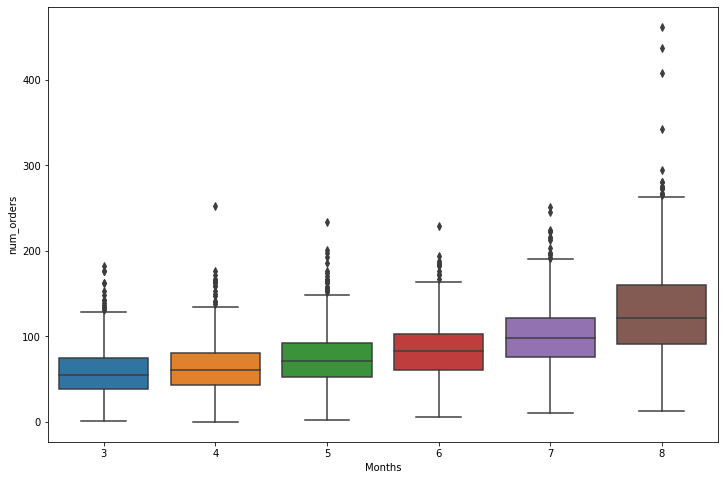

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=data, x=data.index.month, y='num_orders', ax=ax);
plt.xlabel('Months');


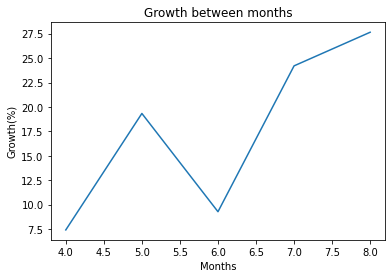

In [16]:
growth = data.groupby(data.index.month)['num_orders'].sum().pct_change().apply(lambda x: x*100)
sns.lineplot(x=growth.index, y=growth);
plt.title('Growth between months');
plt.xlabel('Months');
plt.ylabel('Growth(%)');


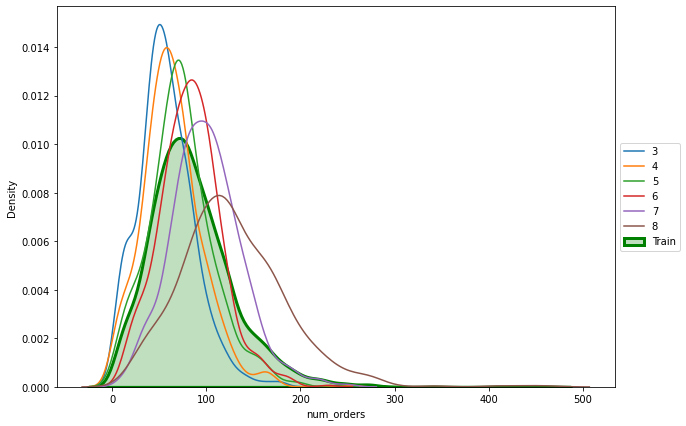

In [17]:
fig,ax = plt.subplots(figsize = (10, 7))
sns.kdeplot(data['num_orders'], label='Train', color="g", lw=3, shade=True, ax=ax);

for month in data.index.month.unique():
  sns.kdeplot(data[data.index.month == month]['num_orders'], label=month, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

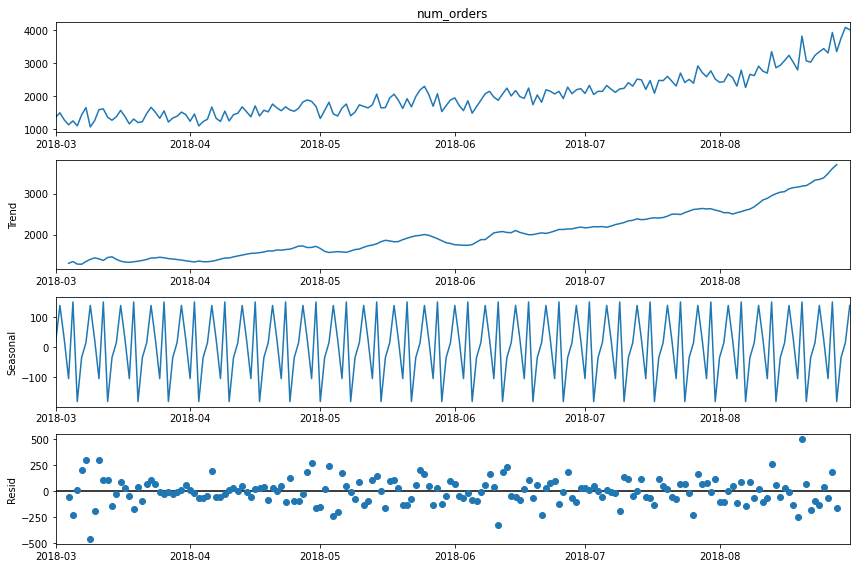

In [18]:
plt.rcParams['figure.figsize'] = (12, 8);
decompose = seasonal_decompose(data_day['num_orders'])
decompose.plot();

S.D is: 635.9


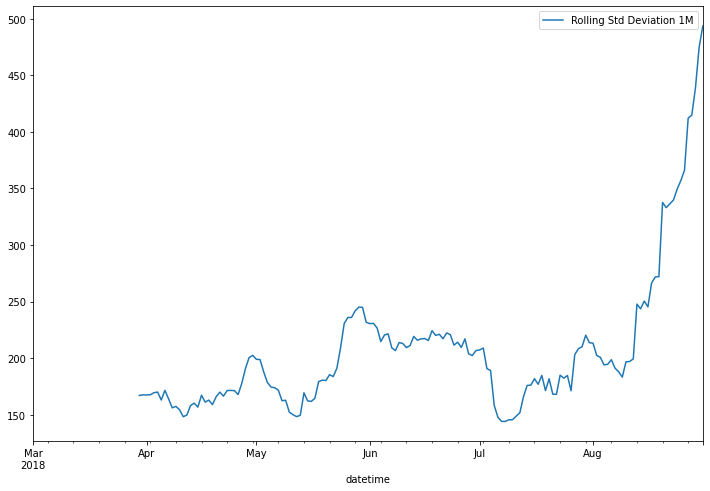

In [19]:
data_day['num_orders'].rolling(30).std().plot(legend=True, label='Rolling Std Deviation 1M')
print('S.D is:', data_day['num_orders'].std().round(1))

Standard deviaton and mean are increasing it´s indicates thate we have a non estationary series

Let´s check using ADF(Augmented Dicky Fuller) test

In [20]:
adf = adfuller(data['num_orders'])[1]
print(f"p value {adf.round(4)}", ", Series is Stationary" if adf < 0.05 else ", Series is Non-Stationary")

p value 0.0289 , Series is Stationary


### Analysis Summary

- Series is stationary
- We dont´t have `NaN` values
- We have some outliers
- Numbers of calls per day are increasing
- Difference between mean and max values  inside a cicle  are increasing, thats indicates a `multiplicative seasonality`.
- Only in June  we have a decreasing in the numbers of calls
- We have a normal distribution of numbers of calls per month]
- Month standard deviaton are increasing

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Excellent job checking the data consistency.

Always important to ensure a robust analysis!

The functions used in the analysis were very suitable for the type of data you are working with; I didn't feel anything was missing in that regard.

To make it perfect here, it would be important to incorporate an intermediate conclusion summarizing the results of all the analyses conducted.
</div>

## Treinamento

In [75]:
#Dividing dataset
train, test = train_test_split(data, shuffle=False, test_size=0.1)

In [76]:
##removing NaN in the train set
train=train.dropna()

In [77]:
#creating features and target train data sets
x_train = train.drop(columns='num_orders', axis=1)
y_train = train['num_orders']

In [78]:
#creating features and target test data sets
x_test = test.drop(columns='num_orders')
y_test = test['num_orders']

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Train test split has been done successfully. 
</div>

### LR model

In [25]:
#trainning linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [26]:
lr_pred_train = lr.predict(x_train)

In [27]:
lr_rmse_train = mean_squared_error(lr_pred_train, y_train)**0.5

In [28]:
print(f'RMSE for trainning set is: {lr_rmse_train}')

RMSE for trainning set is: 30.524659159445676


### Random Forest Regressor

In [35]:
#rf tunning function
def rf_tunning(params, x_train, y_train, x_test, y_test):
    best_result = float('inf')
    best_rf_model = None
    best_rf_params = None
    for est in params['n_estimators']:
        for depth in params['max_depth']:
            model = RandomForestRegressor(n_estimators =est, max_depth=depth)
            model.fit(x_train, y_train)
            model_pred = model.predict(x_test)
            model_result = mean_squared_error(y_test, model_pred, squared=False)
            if model_result < best_result:
                best_result = model_result
                best_rf_model = model
                best_rf_params = {'n_estimators': est, 'max_depth': depth}
                
    return best_rf_model, best_rf_params

In [36]:
params = {
    'n_estimators': [20, 50, 100],
    'max_depth': [20, 40, 60]
}
rf_model, rf_params = rf_tunning(params, x_train, y_train, x_test, y_test)

In [37]:
print(rf_model)
print(rf_params)

RandomForestRegressor(max_depth=60, n_estimators=20)
{'n_estimators': 20, 'max_depth': 60}


### ARIMA model

In [40]:
from pmdarima import ARIMA

In [130]:
start=len(train)
end=len(train) + len(test)
periods = end - start

In [139]:
#arima tunning function
def arima_tunning(params, train, test, periods):
    best_result = float('inf')
    best_ar_model = None
    best_ar_params = None
    for p in params['p_values']:
        for d in params['d_values']:
            for q in params['q_values']:
                model = ARIMA(order=(p, d, q))
                model_fit = model.fit(train, disp=False)
                model_pred = model_fit.predict(n_periods=periods)
                model_result = mean_squared_error(test, model_pred, squared=False)
                if model_result < best_result:
                    best_result = model_result
                    best_ar_model = model
                    best_ar_params = {'p_values': p, 'd_values': d, 'q_values': q}
    return best_ar_model, best_ar_params

In [146]:
#creating hyperparameters
ar_params = {
    'p_values': [0, 1, 2],
    'd_values': [0, 1, 2],
    'q_values': [0, 1, 2]
}

In [147]:
best_ar_model, best_ar_params = arima_tunning(ar_params, y_train, y_test, periods)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

KeyboardInterrupt: 

In [141]:
print(best_ar_params)

{'p_values': 0, 'd_values': 1, 'q_values': 0}


### AUTO ARIMA Model

In [29]:
!pip install --upgrade --user -q numpy==1.21.2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
pip install -q pmdarima

Note: you may need to restart the kernel to use updated packages.


In [31]:
non_stationary = True
d = 0
diff_train = train
while non_stationary:
  diff_train = diff_train.diff().dropna()
  d = d + 1
  adf = adfuller(diff_train["num_orders"])[1]
  non_stationary = adf >= 0.05

  if d > 10:
    raise Exception('It was not possible to get a stationary series with 10 diffs')

print("Number of diffs to make series stationary:", d)

Number of diffs to make series stationary: 1


In [ ]:
import pmdarima as pm
from pmdarima import auto_arima

In [122]:
auto_model = pm.auto_arima(y_train, seasonal=True, max_d=1)

In [82]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3969
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -19596.315
Date:                Tue, 19 Mar 2024   AIC                          39196.629
Time:                        01:43:54   BIC                          39209.201
Sample:                    03-01-2018   HQIC                         39201.087
                         - 08-13-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4874      0.010    -46.790      0.000      -0.508      -0.467
sigma2      1140.4692     20.465     55.728      0.000    1100.359    1180.580
===================================================================================
Ljung-Box (L1) (Q):                  34.88   Jarque-Bera (JB):               217.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMAX Model

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [113]:
def sarimax_tunning(params, train, test):
    best_result = float('inf')
    best_sa_model = None
    best_sa_params = None
    for p in params['p_values']:
        for d in params['d_values']:
            for q in params['q_values']:
                model = SARIMAX(endog=train, order=(p, d, q), trend='c', enforce_invertibility=False)
                model_fit = model.fit(disp=False)
                start = len(train)
                end = len(train) + len(test) - 1
                model_pred = model_fit.predict(start, end, dynamic=False)
                model_result = mean_squared_error(test, model_pred, squared=False)
                if model_result < best_result:
                    best_result = model_result
                    best_sa_model = model
                    best_sa_params = {'p_values': p, 'd_values': d, 'q_values': q}
    return best_sa_model, best_sa_params

In [114]:
#creating hyperparameters
sa_params = {
    'p_values': [0, 1, 2],
    'd_values': [0, 1, 2],
    'q_values': [0, 1, 2]
}
best_sa_model, best_sa_params = sarimax_tunning(sa_params, y_train, y_test)

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [116]:
print(best_sa_params)

{'p_values': 0, 'd_values': 1, 'q_values': 0}


### Exponential Smootging Model

In [152]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [159]:
ets = ExponentialSmoothing(y_train, trend='add', initialization_method= 'heuristic', seasonal='add')
ets_fit = ets.fit()
fc = ets_fit.forecast(len(y_test))

## Testando

### Linear Regression test

In [38]:
lr_pred_test = lr.predict(x_test)
lr_rmse_test = mean_squared_error(lr_pred_test, y_test, squared=False)
print(f'RMSE for test set is: {lr_rmse_test}')

RMSE for test set is: 52.761790066268844


Our LR model not attend the specification

### Random Forest Regressor Test

In [39]:
rf = RandomForestRegressor(max_depth=20, n_estimators=100)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_rmse = mean_squared_error(rf_pred, y_test, squared=False)
print(f'RMSE for RandomForestRegressor is:{rf_rmse}')

RMSE for RandomForestRegressor is:56.18130992392622


Our RFR model not attend the specification

### ARIMA Test

In [144]:
arima_model = ARIMA(order=(0, 1, 0))
arima_fit = arima_model.fit(y_train, disp=False)
arima_pred = arima_fit.predict(n_periods=periods)


In [162]:
arima_rmse = mean_squared_error(arima_pred, y_test, squared=False)
print(f'RMSE for ARIMA is:{arima_rmse}')

RMSE for ARIMA is:59.6029591265964


### Auto Arima Test

In [167]:
auto_sarima_model = SARIMAX(endog=y_train, order=(0,1,1), trend='c', enforce_invertibility=False)
auto_sarima_fit = sarima_model.fit(disp=False)
start = len(y_train)
end = len(y_train) + len(y_test) - 1
auto_sarima_pred = auto_sarima_fit.predict(start, end, dynamic=False)



In [168]:
auto_sarima_rmse = mean_squared_error(auto_sarima_pred, y_test, squared=False)
print(f'RMSE for Auto Arima is:{auto_sarima_rmse}')

RMSE for Auto Arima is:59.6029591265964


Our Auto Arima model not attend the specification

### SARIMAX Test

In [117]:
sarima_model = SARIMAX(endog=y_train, order=(0,1,0), trend='c', enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)
start = len(y_train)
end = len(y_train) + len(y_test) - 1
sarima_pred = sarima_fit.predict(start, end, dynamic=False)

In [169]:
sarima_rmse = mean_squared_error(sarima_pred, y_test, squared=False)
print(f'RMSE for SARIMAX is:{sarima_rmse}')

RMSE for SARIMAX is:59.6029591265964


Our Sarimax model not attend the specification

### Exponential Smoothing Test

In [170]:
ets_rmse = mean_squared_error(y_test, fc, squared=False)
print(f'RMSE for ETS is:{ets_rmse}')

RMSE for ETS is:40.44022411277217


## Results

The only model that attend the objective was ETS

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelent job with the models! 
    
You`ve chosen models that make sense to his dataset and tried different parameters to find the best version of each one! Well done.
</div>

# Revisão da checklist

- [x]  O Jupyter Notebook está aberto.

- [x]  O código está livre de erros
- [x]  As células com o código foram organizadas em ordem de execução.
- [x]  Os dados foram baixados e preparados

- [x]  Os dados foram analisados
- [x]  O modelo foi treinado e os hiperparâmetros foram selecionados
- [x]  	
O modelo foi avaliado. Uma conclusão foi fornecida

- [x] 
O REQM para o conjunto de teste não é maior que 48